In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.dpi": 120,
    "figure.figsize": (12, 6)
})


In [2]:
# Cell 3
df = pd.read_csv("data.csv")

# Parse created_at as datetime (UTC)
df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce", utc=True)

# Drop rows with invalid dates
df = df.dropna(subset=["created_at"]).reset_index(drop=True)

# Sort by date and print first/last timestamp
df = df.sort_values("created_at").reset_index(drop=True)

first_ts = df["created_at"].iloc[0]
last_ts = df["created_at"].iloc[-1]
print("Total rows loaded:", len(df))
print("First timestamp:", first_ts)
print("Last timestamp:", last_ts)


Total rows loaded: 807174
First timestamp: 2018-09-30 01:17:15+00:00
Last timestamp: 2019-02-18 23:59:11+00:00


Adding class e weekly column

In [5]:
# Cell 4: assign class name and create week column
class_map = {0: "Non Hate", 1: "Hate"}
df["class"] = df["category"].map(class_map)

# Create year-week column (ISO week)
df["year_week"] = df["created_at"].dt.strftime("%Y-W%U")  # %U = week number of year (Sunday-based)
# Note: %V would be ISO week (Monday-based), can choose if preferred

print("Class counts:")
print(df["class"].value_counts())

Class counts:
Non Hate    711840
Hate         95334
Name: class, dtype: int64


Overall dataset class distribution

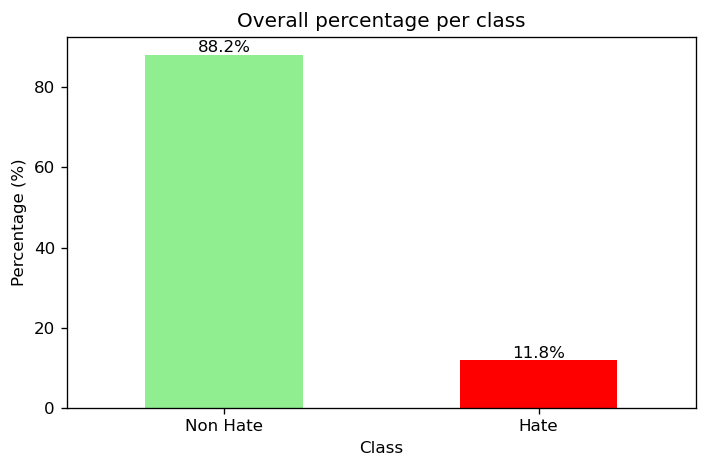

In [8]:
class_percent = df["class"].value_counts(normalize=True).reindex(["Non Hate", "Hate"]).fillna(0) * 100
colors = {"Non Hate": "lightgreen", "Hate": "red"}

plt.figure(figsize=(6,4))
class_percent.plot(kind="bar", color=[colors[k] for k in class_percent.index])
plt.title("Overall percentage per class")
plt.ylabel("Percentage (%)")
plt.xlabel("Class")
plt.xticks(rotation=0)
for i, v in enumerate(class_percent):
    plt.text(i, v + 0.6, f"{v:.1f}%", ha="center")
plt.tight_layout()
plt.show()

Weekly distribution of classes

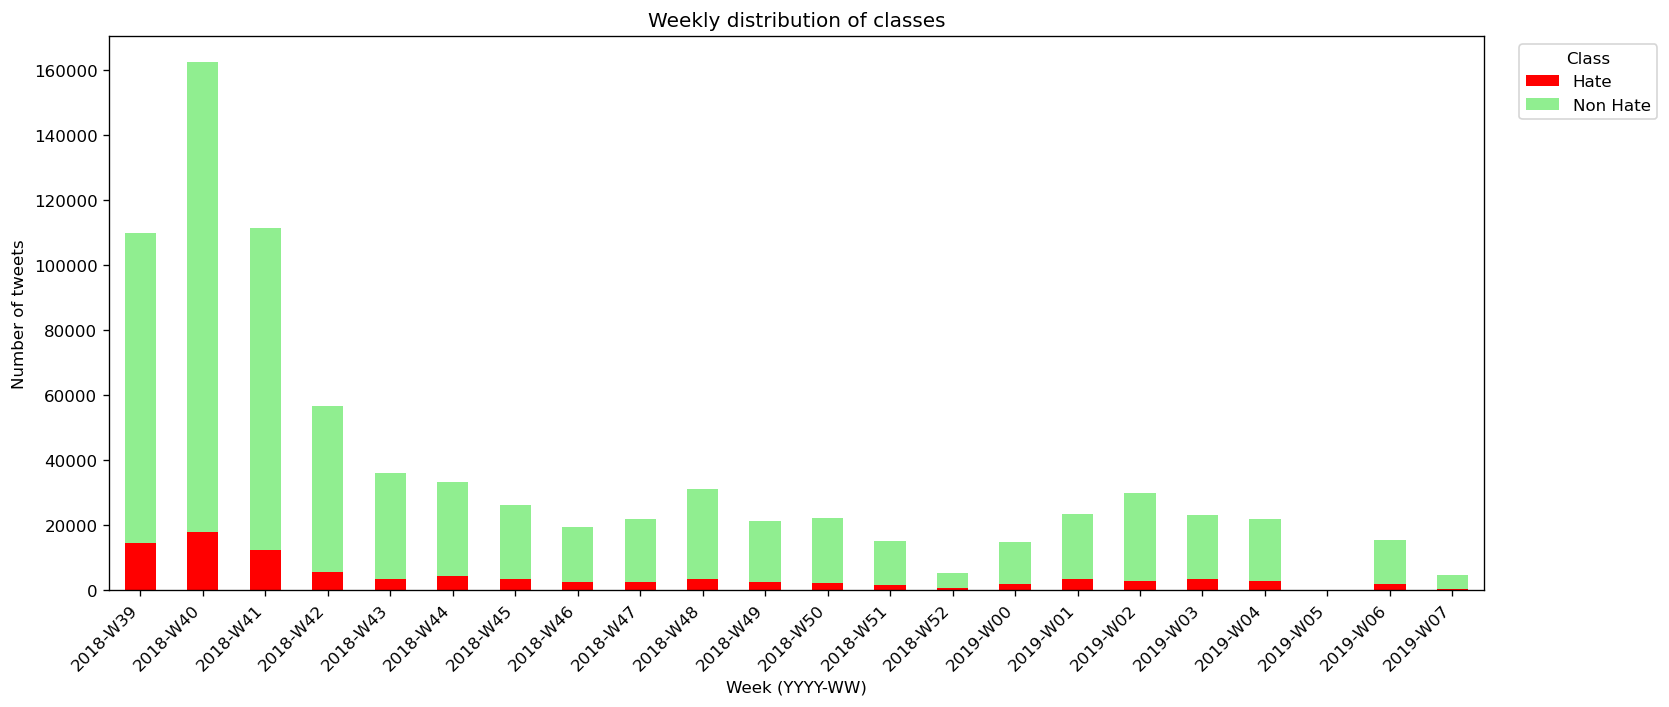

In [11]:
# Cell 6: counts per week per class
weekly_counts = df.groupby(["year_week", "class"]).size().unstack(fill_value=0).sort_index()
# Cell 7: stacked bar chart by week
weekly_counts.plot(kind="bar", stacked=True, figsize=(14,6), color=[colors.get(c) for c in weekly_counts.columns])
plt.title("Weekly distribution of classes")
plt.xlabel("Week (YYYY-WW)")
plt.ylabel("Number of tweets")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Class", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


Weekly distribution per class

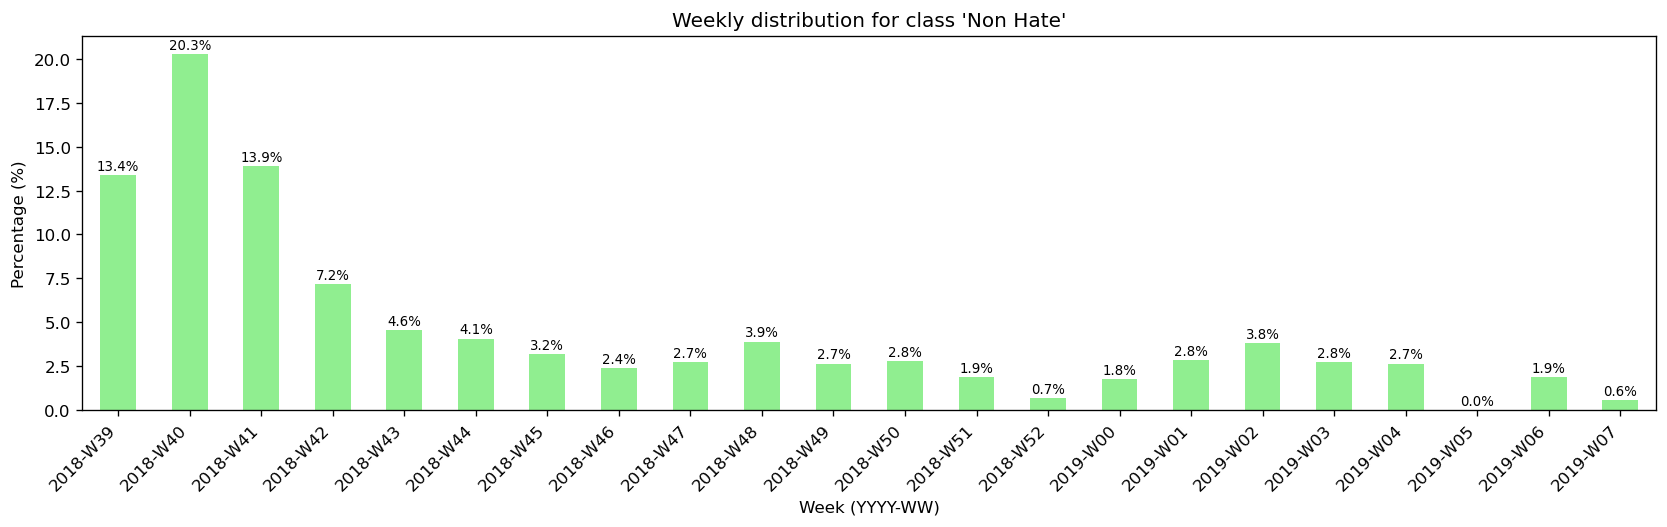

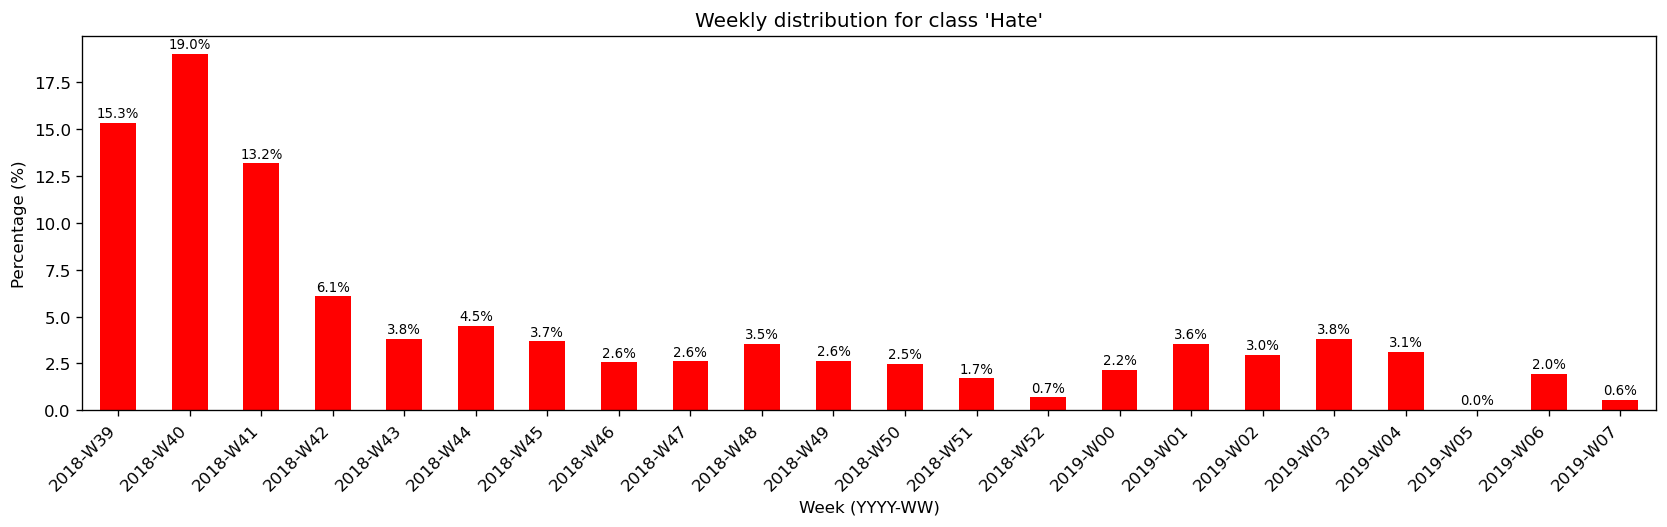

In [14]:
# Cell 9: for each class, weekly distribution as percentage of that class total
for cls in ["Non Hate", "Hate"]:
    df_cls = df[df["class"] == cls]
    if df_cls.empty:
        continue
    counts_per_week = df_cls.groupby("year_week").size().sort_index()
    percent_per_week = counts_per_week / counts_per_week.sum() * 100

    plt.figure(figsize=(14,4.5))
    percent_per_week.plot(kind="bar", color=colors[cls])
    plt.title(f"Weekly distribution for class '{cls}'")
    plt.xlabel("Week (YYYY-WW)")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45, ha="right")
    for i, val in enumerate(percent_per_week):
        plt.text(i, val + 0.3, f"{val:.1f}%", ha="center", fontsize=8)
    plt.tight_layout()
    plt.show()


Weekly distribution of dataset

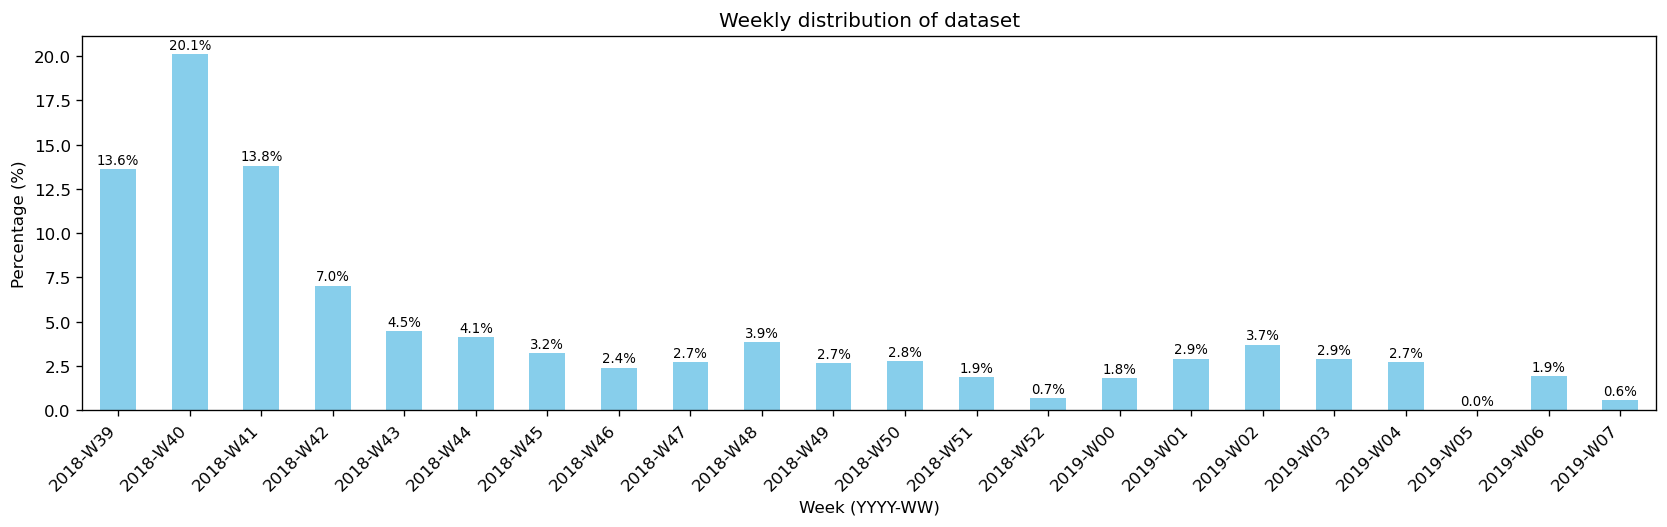

In [16]:
# Cell 10: weekly distribution ignoring class
weekly_totals = weekly_counts.sum(axis=1)
weekly_percent_all = weekly_totals / weekly_totals.sum() * 100

plt.figure(figsize=(14,4.5))
weekly_percent_all.plot(kind="bar", color="skyblue")
plt.title("Weekly distribution of dataset")
plt.xlabel("Week (YYYY-WW)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45, ha="right")
for i, val in enumerate(weekly_percent_all):
    plt.text(i, val + 0.3, f"{val:.1f}%", ha="center", fontsize=8)
plt.tight_layout()
plt.show()
